<B><h1 style="text-align:center;"> Import </h1></B>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

<B><h1 style="text-align:center;"> Upload datasets </h1></B>

In [7]:
ratings = pd.read_csv('/content/rating.csv')
anime   = pd.read_csv('/content/anime.csv')

<b><h1 style="text-align:center; color:green" id="EDA"> EDA part </h1></b>
<b><h3 style="text-align:center;"> Preview Ratings dataset </h3></b>

In [8]:
ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


Replacing "rating" column with "user_rating" because the anime dataset already has "rating column". Looking for merging them.

In [9]:
ratings['user_rating'] = ratings['rating']
ratings.drop('rating', axis=1, inplace = True)
ratings.head()

,user_id,anime_id,user_rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


<h3 style="text-align:center;"> Preview Anime dataset </h3>

In [10]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


<h3 style="text-align:center;"> View the number of rows and columns in our dataset </h3>

In [11]:
print(f'Shape of ratings:{ratings.shape}\nShape of anime:{anime.shape}')

Shape of ratings:(871126, 3)
Shape of anime:(12294, 7)


<h3 style="text-align:center;"> View the number of unique values foreach column </h3>

In [12]:
anime.nunique()

,0
anime_id,12294
name,12292
genre,3264
type,6
episodes,187
rating,598
members,6706


<h3 style="text-align:center;"> "name" column analysis </h3>

In [13]:
anime['name'].isna().sum()

0

In [14]:
anime[anime.duplicated(['name'])]

,anime_id,name,genre,type,episodes,rating,members
10141,30059,Saru Kani Gassen,Drama,Movie,1,4.75,76
10194,33195,Shi Wan Ge Leng Xiaohua,"Action, Adventure, Comedy, Fantasy, Parody",Movie,1,7.07,110


In [15]:
anime[(anime['name'] == 'Saru Kani Gassen')|(anime['name'] == 'Shi Wan Ge Leng Xiaohua')]

,anime_id,name,genre,type,episodes,rating,members
10140,22399,Saru Kani Gassen,Kids,OVA,1,5.23,62
10141,30059,Saru Kani Gassen,Drama,Movie,1,4.75,76
10193,33193,Shi Wan Ge Leng Xiaohua,"Comedy, Parody",ONA,12,6.67,114
10194,33195,Shi Wan Ge Leng Xiaohua,"Action, Adventure, Comedy, Fantasy, Parody",Movie,1,7.07,110


<h3 style="text-align:center;"> "genre column analysis" </h3>

In [16]:
anime['genre'].isna().sum()

62

In [17]:
anime['genre'].value_counts().sort_values(ascending=False).head(20)

,count
genre,
Hentai,823
Comedy,523
Music,301
Kids,199
"Comedy, Slice of Life",179
Dementia,137
"Fantasy, Kids",128
Fantasy,114
"Comedy, Kids",112


<ipython-input-18-b41d47099672>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='genre', data=anime, palette="Greens_d", order=anime['genre'].value_counts().iloc[:15].index)


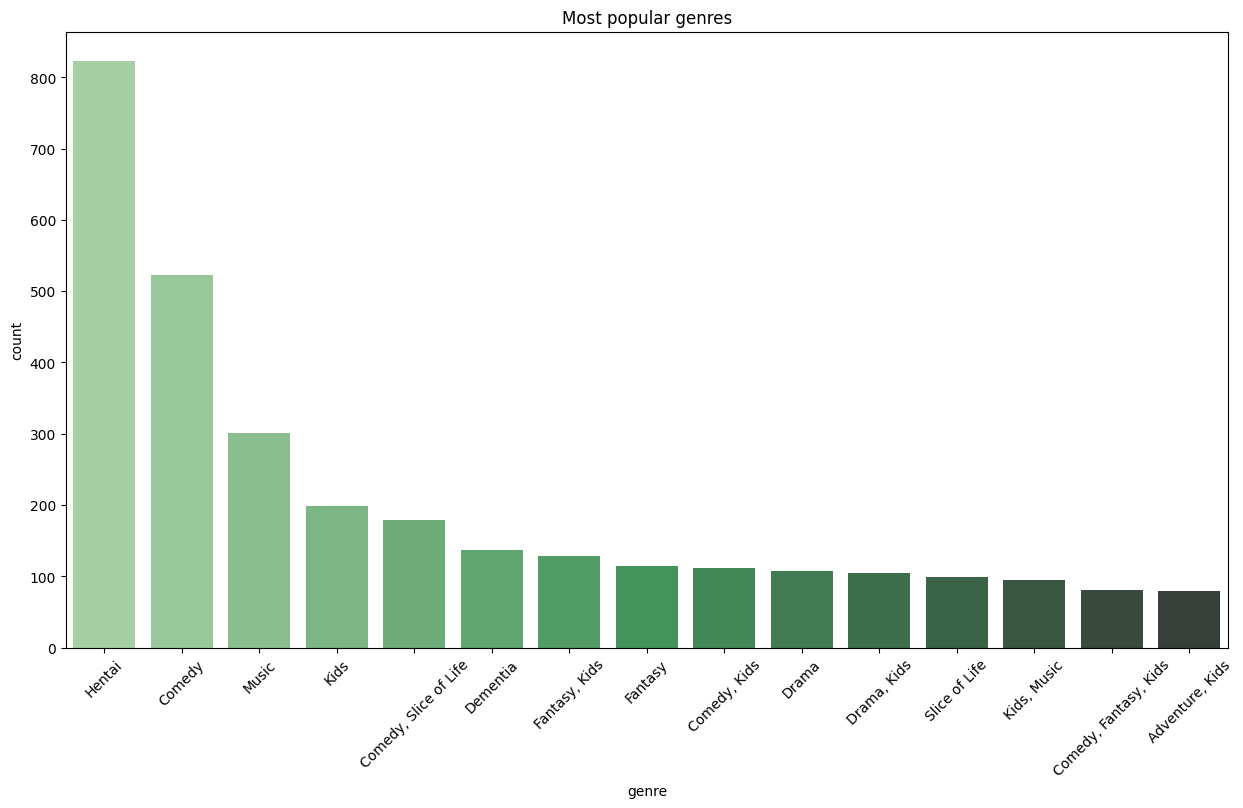

In [18]:
plt.figure(figsize=(15, 8))
plt.title('Most popular genres')
sns.countplot(x='genre', data=anime, palette="Greens_d", order=anime['genre'].value_counts().iloc[:15].index)
plt.xticks(rotation=45)
plt.show()

<b><h3 style="text-align:center;"> "type" column analysis </h3></b>

<ipython-input-19-1cb267772b3f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='type', data=anime, palette='rocket')


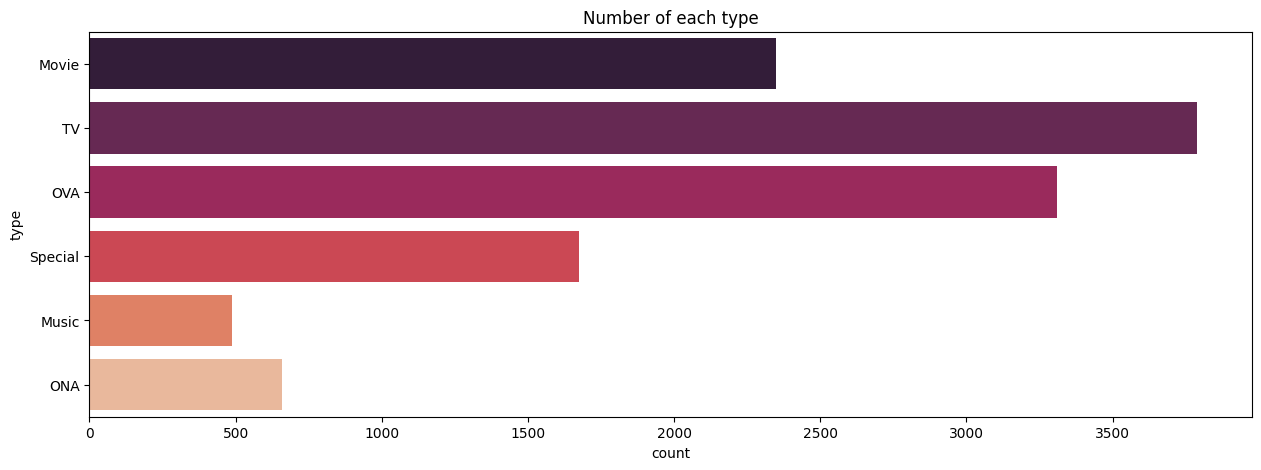

In [19]:
plt.figure(figsize=(15, 5))
plt.title('Number of each type')
sns.countplot(y='type', data=anime, palette='rocket')
plt.show()

<b><h3 style="text-align:center;"> "rating" column analysis</h3></b>

In [20]:
anime.dropna(inplace=True)

In [21]:
anime['rating'].value_counts().sort_values(ascending=False).head(15)

,count
rating,
6.00,141
7.00,98
6.50,90
6.25,84
5.00,76
6.75,72
6.67,68
6.38,67
6.80,67


In [22]:
anime['rating'].isna().sum()

0

In [23]:
anime['rounded_rating'] = anime['rating'].apply(lambda x: round(x))
anime.head()

,anime_id,name,genre,type,episodes,rating,members,rounded_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,9
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,9
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,9
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,9
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,9


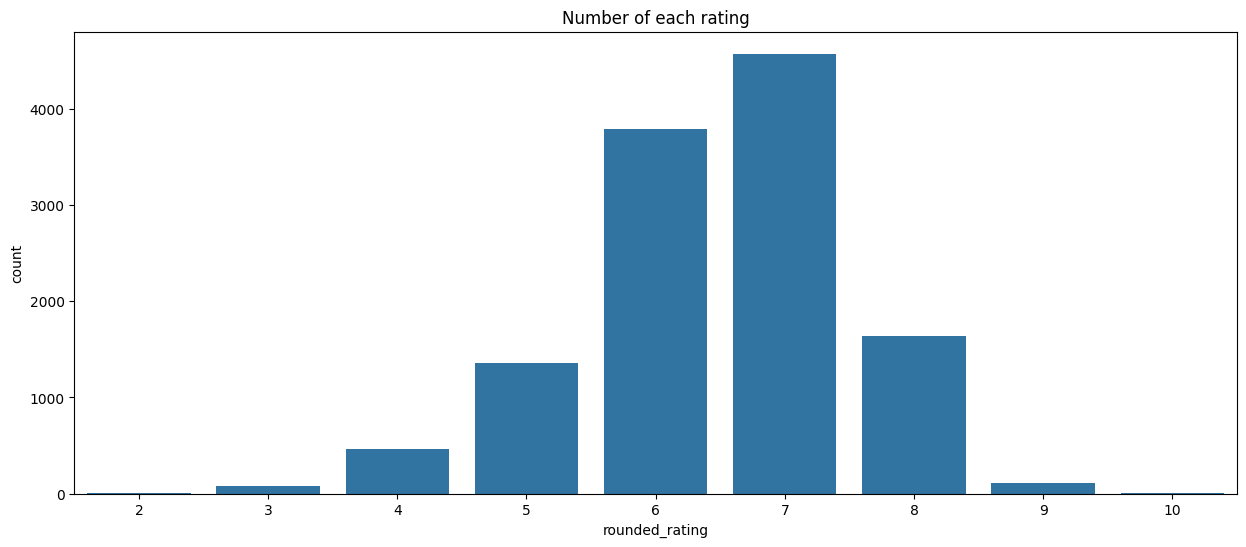

In [24]:
plt.figure(figsize=(15,6))
sns.countplot(data=anime, x='rounded_rating')
plt.title('Number of each rating')
plt.show()

In [25]:
ratings.head()

,user_id,anime_id,user_rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


When the users didn't leave rating it was set to -1, so lets drop them

In [26]:
ratings['user_rating'] = ratings['user_rating'].apply(lambda x: np.nan if x == -1 else x)
ratings.dropna(inplace=True)
ratings.head()

,user_id,anime_id,user_rating
47,1,8074,10.0
81,1,11617,10.0
83,1,11757,10.0
101,1,15451,10.0
153,2,11771,10.0


Getting the average user rating to each anime

In [27]:
user_ratings = ratings.groupby(['anime_id'], as_index=False)['user_rating'].mean()

Merging datasets

In [28]:
anime_user_rating = pd.merge(anime, user_ratings, on='anime_id')

In [29]:
anime_user_rating.head(3)

,anime_id,name,genre,type,episodes,rating,members,rounded_rating,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,9,9.374302
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,9,9.341739
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,9,9.518797


Recommendation engine

Choosing the columns that i think are important

In [30]:
columns = ['name','genre','type','rating','user_rating']

In [31]:
anime_user_rating[columns].isna().sum()

,0
name,0
genre,0
type,0
rating,0
user_rating,0


Create the column with all these important columns together

In [32]:
def get_important_features(data):
    important_features = []
    for i in range(0, data.shape[0]):
                   important_features.append(data['name'][i]+' '+data['genre'][i]+' '+data['type'][i]+' '+str(data['rating'][i])+' '+str(data['user_rating'][i]))

    return important_features

In [33]:
anime_user_rating['important_features'] = get_important_features(anime_user_rating)

In [34]:
anime_user_rating.head(3)

,anime_id,name,genre,type,episodes,rating,members,rounded_rating,user_rating,important_features
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,9,9.374302,"Kimi no Na wa. Drama, Romance, School, Superna..."
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,9,9.341739,"Fullmetal Alchemist: Brotherhood Action, Adven..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,9,9.518797,"Gintama° Action, Comedy, Historical, Parody, S..."


In [35]:
cm = CountVectorizer().fit_transform(anime_user_rating['important_features'])

In [36]:
cs = cosine_similarity(cm)
print(cs)

[[1.         0.0836242  0.         ... 0.         0.         0.12309149]
 [0.0836242  1.         0.24019223 ... 0.         0.         0.        ]
 [0.         0.24019223 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.36514837 0.33333333]
 [0.         0.         0.         ... 0.36514837 1.         0.36514837]
 [0.12309149 0.         0.         ... 0.33333333 0.36514837 1.        ]]


In [37]:
title = 'Fullmetal Alchemist: Brotherhood'
anime_id = anime_user_rating[anime_user_rating['name'] == title]['anime_id'].values[0]

In [38]:
print(anime_id)

5114


In [39]:
scores = list(enumerate(cs[anime_id]))

In [40]:
sorted_scores = sorted(scores, key = lambda x: x[1], reverse=True)
sorted_scores = sorted_scores[1:]

In [41]:
j = 0
print('The 5 most recommended anime to', title, 'are:\n')
for item in sorted_scores:
    # Filter the DataFrame based on anime_id
    filtered_df = anime_user_rating[anime_user_rating['anime_id'] == item[0]]

    # Check if the filtered DataFrame is empty
    if not filtered_df.empty:
        # If not empty, get the movie title
        movie_title = filtered_df['name'].values[0]
        print(j + 1, movie_title)
        j += 1
        if j > 4:
            break
    else:
        # If empty, skip this item and continue to the next
        continue

The 5 most recommended anime to Fullmetal Alchemist: Brotherhood are:

1 Kyoushirou to Towa no Sora
2 Mobile Suit Gundam Seed
3 Yokohama Kaidashi Kikou
4 Choujikuu Seiki Orguss 02
5 Ijoku


Deep Learning-Based Collaborative Filtering

---



---



In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

ratings = pd.read_csv('/content/rating.csv')
anime   = pd.read_csv('/content/anime.csv')

ratings_filtered = ratings[ratings['rating'] > 0].copy()

# Encode 'user_id' and 'anime_id' for use in embedding layers
user_encoder = LabelEncoder()
anime_encoder = LabelEncoder()
ratings_filtered['user'] = user_encoder.fit_transform(ratings_filtered['user_id'])
ratings_filtered['anime'] = anime_encoder.fit_transform(ratings_filtered['anime_id'])

# Split the data into training and validation sets
train_data, val_data = train_test_split(ratings_filtered, test_size=0.2, random_state=42)

# Display the first few rows of the processed data for verification
train_data.head(), val_data.head()

(         user_id  anime_id  rating  user  anime
 921733      8308       181       7  7878    157
 233674      2403       813      10  2253    728
 813830      7507      9919       7  7109   5021
 455363      4687      1132      10  4400   1021
 1022430     9723       226       6  9201    201,
          user_id  anime_id  rating  user  anime
 428175      4409     23283       8  4138   6832
 863970      7880       420       6  7470    390
 1004712     9437       317      10  8929    290
 141459      1431      2993       6  1344   2622
 713205      6710     10620       8  6342   5251)

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Input, Dense, Flatten, Concatenate

# Hyperparameters
embedding_dim = 50  # Dimension of the embedding space

# Input layers for user and anime IDs
user_input = Input(shape=(1,), name='user_input')
anime_input = Input(shape=(1,), name='anime_input')

# Embedding layers for users and anime
user_embedding = Embedding(input_dim=len(user_encoder.classes_), output_dim=embedding_dim, name='user_embedding')(user_input)
anime_embedding = Embedding(input_dim=len(anime_encoder.classes_), output_dim=embedding_dim, name='anime_embedding')(anime_input)

# Flatten embeddings
user_flat = Flatten()(user_embedding)
anime_flat = Flatten()(anime_embedding)

# Concatenate user and anime embeddings
concat = Concatenate()([user_flat, anime_flat])

# Dense layers to learn interactions
x = Dense(128, activation='relu')(concat)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)

# Output layer (predicting the rating)
output = Dense(1)(x)

# Define the model
model = Model(inputs=[user_input, anime_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Summary of the model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ user_input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ anime_input (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ user_embedding            │ (None, 1, 50)          │        463,250 │ user_input[0][0]       │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ anime_embedding           │ (None, 1, 50)          │        396,250 │ anime_input[0][0]      │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 50)             │              0 │ user_embedding[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 50)             │              0 │ anime_embedding[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 100)            │              0 │ flatten[0][0],         │
│                           │                        │                │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │         12,928 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          8,256 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 32)             │          2,080 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │             33 │ dense_2[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 882,797 (3.37 MB)

 Trainable params: 882,797 (3.37 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Prepare inputs for training
train_user_ids = train_data['user'].values
train_anime_ids = train_data['anime'].values
train_ratings = train_data['rating'].values

val_user_ids = val_data['user'].values
val_anime_ids = val_data['anime'].values
val_ratings = val_data['rating'].values

# Train the model
history = model.fit(
    [train_user_ids, train_anime_ids], train_ratings,
    validation_data=([val_user_ids, val_anime_ids], val_ratings),
    epochs=10,  # You can adjust the number of epochs as needed
    batch_size=256,  # Adjust batch size depending on available resources
    verbose=1
)




Epoch 1/10
2614/2614 ━━━━━━━━━━━━━━━━━━━━ 32s 12ms/step - loss: 1.4158 - root_mean_squared_error: 1.1899 - val_loss: 1.4300 - val_root_mean_squared_error: 1.1958
Epoch 2/10
2614/2614 ━━━━━━━━━━━━━━━━━━━━ 37s 14ms/step - loss: 1.2934 - root_mean_squared_error: 1.1372 - val_loss: 1.4216 - val_root_mean_squared_error: 1.1923
Epoch 3/10
2614/2614 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - loss: 1.1966 - root_mean_squared_error: 1.0939 - val_loss: 1.4123 - val_root_mean_squared_error: 1.1884
Epoch 4/10
2614/2614 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - loss: 1.0910 - root_mean_squared_error: 1.0445 - val_loss: 1.4297 - val_root_mean_squared_error: 1.1957
Epoch 5/10
2614/2614 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - loss: 0.9937 - root_mean_squared_error: 0.9967 - val_loss: 1.4574 - val_root_mean_squared_error: 1.2072
Epoch 6/10
2614/2614 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - loss: 0.9133 - root_mean_squared_error: 0.9556 - val_loss: 1.4798 - val_root_mean_squared_error: 1.2165
Epoch 7/10
2614/2614 ━━━━━━━

In [48]:
#save model
model.save('model.keras')

In [50]:
# Evaluate the model on the validation set
val_loss, val_rmse = model.evaluate([val_user_ids, val_anime_ids], val_ratings, verbose=1)
print(f"Validation RMSE: {val_rmse:.4f}")


5228/5228 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 1.5945 - root_mean_squared_error: 1.2626
Validation RMSE: 1.2590


Predict Ratings: For each user, we’ll predict the ratings for all anime they haven’t rated yet.
Recommend Top Anime: Sort anime by predicted rating and select the top recommendations.

In [53]:
import numpy as np

# Function to get recommendations for a specific user
def get_recommendations(user_id, top_n=10):
    # Get internal user index
    user_idx = user_encoder.transform([user_id])[0]

    # Get all anime indices
    all_anime_indices = np.arange(len(anime_encoder.classes_))

    # Predict ratings for all anime for the specified user
    user_array = np.array([user_idx] * len(all_anime_indices))
    predicted_ratings = model.predict([user_array, all_anime_indices], verbose=0)

    # Sort anime by predicted rating
    top_anime_indices = np.argsort(predicted_ratings.flatten())[-top_n:][::-1]
    recommended_anime_ids = anime_encoder.inverse_transform(top_anime_indices)

    # Retrieve anime titles based on IDs
    recommendations = anime[anime['anime_id'].isin(recommended_anime_ids)][['anime_id', 'name']]

    return recommendations

# Example: Get top 10 recommendations for a specific user
user_id = 1  # Replace with an actual user_id from your dataset
top_recommendations = get_recommendations(user_id, top_n=10)
print(f"Top 10 recommendations for user {user_id}")
print(top_recommendations)


Top 10 recommendations for user 1
      anime_id                                               name
264       4814                                 Junjou Romantica 2
437       3092                                   Junjou Romantica
1054      6152  Final Fantasy VII: Advent Children - Venice Fi...
1288     22539                     One More Time, One More Chance
2015     10825  Ranma ½: Battle ga Ippai 29-nin no Korinai Yat...
2130      9241               Super Robot Taisen OG: The Inspector
2866      7113                        30th Gundam Perfect Mission
2925     10819          Ranma ½: Tendou-ke no Oyobidenai Yatsura!
3274      4208                             Tetsujin 28-gou (1980)
7383     17843                            Inferno Cop: Fact Files


Identify Genres: Filter recommendations to ensure a variety of genres appear in the top recommendations.
Select Top Anime per Genre: For each genre, select highly rated anime for the user.

In [54]:
# Function to get diverse recommendations by genre
def get_diverse_recommendations(user_id, top_n=10):
    user_idx = user_encoder.transform([user_id])[0]
    all_anime_indices = np.arange(len(anime_encoder.classes_))

    # Predict ratings for all anime for the specified user
    user_array = np.array([user_idx] * len(all_anime_indices))
    predicted_ratings = model.predict([user_array, all_anime_indices], verbose=0).flatten()

    # Merge predictions with anime information
    anime_predictions = pd.DataFrame({
        'anime_id': anime_encoder.inverse_transform(all_anime_indices),
        'predicted_rating': predicted_ratings
    })
    anime_predictions = anime_predictions.merge(anime[['anime_id', 'name', 'genre']], on='anime_id')

    # Initialize a dictionary to store diverse recommendations
    genre_groups = anime_predictions.groupby('genre')
    diverse_recommendations = []

    for genre, group in genre_groups:
        # Sort by predicted rating and take the top recommendation for each genre
        top_anime_per_genre = group.sort_values(by='predicted_rating', ascending=False).head(1)
        diverse_recommendations.append(top_anime_per_genre)

    # Concatenate results and get top N recommendations based on the predicted rating
    diverse_recommendations = pd.concat(diverse_recommendations).sort_values(by='predicted_rating', ascending=False).head(top_n)
    return diverse_recommendations[['anime_id', 'name', 'genre', 'predicted_rating']]

# Example: Get top 10 diverse recommendations for a user
user_id = 1  # Replace with an actual user_id
diverse_recommendations = get_diverse_recommendations(user_id, top_n=10)
print(f"Top 10 diverse recommendations for user {user_id}")
print(diverse_recommendations)


      anime_id                                               name  \
5330     10825  Ranma ½: Battle ga Ippai 29-nin no Korinai Yat...   
4367      7113                        30th Gundam Perfect Mission   
3339      4208                             Tetsujin 28-gou (1980)   
3563      4814                                 Junjou Romantica 2   
6243     17843                            Inferno Cop: Fact Files   
4033      6152  Final Fantasy VII: Advent Children - Venice Fi...   
6752     22539                     One More Time, One More Chance   
4851      9241               Super Robot Taisen OG: The Inspector   
1135      1254                                        Saint Seiya   
5972     15451                                High School DxD New   

                                                  genre  predicted_rating  
5330                Comedy, Martial Arts, Slice of Life         10.899734  
4367                                      Mecha, Sci-Fi         10.863212  
3339        

Grouping by Genre: The code groups predictions by genre and then picks the top recommendation from each genre.
Selecting Top N: After selecting top recommendations per genre, the function takes the top N to ensure diversity.

New Users: Recommend popular anime or trending genres based on overall ratings.
New Anime: Recommend to users who have shown interest in similar genres.

In [59]:
# Function to recommend popular anime for a new user
def recommend_for_new_user(top_n=10):
    # Select top-rated anime from overall ratings
    popular_anime = ratings.groupby('anime_id').rating.mean().sort_values(ascending=False).head(top_n).index
    recommendations = anime[anime['anime_id'].isin(popular_anime)][['anime_id', 'name', 'genre']]
    return recommendations

# Example: Get recommendations for a new user
new_user_recommendations = recommend_for_new_user(top_n=10)
print("Recommendations for a new user:")
print(new_user_recommendations)


Recommendations for a new user:
      anime_id                                               name  \
3039      5895                           Tistou Midori no Oyayubi   
3241     27653  Crayon Shin-chan Movie 23: Ora no Hikkoshi Mon...   
4418      8542                                 Shin Ace wo Nerae!   
4902      8140          Konchuu Monogatari Minashigo Hutch (1989)   
6644     28959                                   Kizuna (Special)   
6648     29323                         Oyaji no, Imo no Kamisama.   
7098     28813                        Bamboo Blade: Fanfu-Fufe-Fo   
9181     17985      Kero Kero Keroppi no Boku-tachi no Takaramono   
9238      6012                                 Kinpatsu no Jeanie   
9537      5994                     Midoriyama Koukou Koushien-hen   

                                       genre  
3039                       Historical, Magic  
3241                   Comedy, Kids, Shounen  
4418  Drama, Romance, School, Shoujo, Sports  
4902                

In [60]:
# Function to find users interested in genres similar to a new anime
def recommend_new_anime(new_anime_id, top_n=10):
    # Get the genre of the new anime
    new_anime_genre = anime.loc[anime['anime_id'] == new_anime_id, 'genre'].values[0]

    # Find users who highly rated anime with similar genres
    similar_anime = anime[anime['genre'] == new_anime_genre]['anime_id']
    interested_users = ratings[ratings['anime_id'].isin(similar_anime) & (ratings['rating'] >= 4)]

    # Recommend this new anime to the top interested users
    top_users = interested_users['user_id'].value_counts().head(top_n).index
    recommended_users = user_encoder.inverse_transform(top_users)

    return recommended_users

# Example: Get users who might like a new anime
new_anime_id = 5114  # Replace with an actual anime_id
users_for_new_anime = recommend_new_anime(new_anime_id, top_n=10)
print(f"Users who might like {anime[anime['anime_id'] == new_anime_id]['name'].values[0]}:")
print(users_for_new_anime)


Users who might like Fullmetal Alchemist: Brotherhood:
[   5 6435 6390 6393 6406 6410 6411 6412 6413 6420]


Popular Anime for New Users: We select anime with the highest average ratings.
Similar Genre Users for New Anime: We recommend a new anime to users who liked other anime in the same genre.

Identify Favorite Genres: For each user, calculate the genres they rate the highest.
Recommend Anime from Favorite Genres: Prioritize anime in these genres that the user hasn’t rated yet.

In [62]:
# Function to identify favorite genres for a user
def get_favorite_genres(user_id, top_n=3):
    # Filter ratings for the specified user
    user_ratings = ratings[ratings['user_id'] == user_id]

    # Merge with anime data to get genres
    user_ratings = user_ratings.merge(anime[['anime_id', 'genre']], on='anime_id')

    # Calculate average rating per genre
    genre_ratings = user_ratings.groupby('genre')['rating'].mean().sort_values(ascending=False)

    # Select the top N genres
    favorite_genres = genre_ratings.head(top_n).index.tolist()
    return favorite_genres

# Example: Get favorite genres for a user
user_id = 1  # Replace with an actual user_id
favorite_genres = get_favorite_genres(user_id, top_n=3)
print(f"Favorite genres for user {user_id}:")
print("Favorite genres for user:", favorite_genres)


Favorite genres for user 1:
Favorite genres for user: ['Action, Ecchi, Horror, Supernatural', 'Action, Comedy, Demons, Ecchi, Harem, Romance, School', 'Comedy, Demons, Ecchi, Harem, Romance, School']


In [63]:
# Function to recommend anime based on favorite genres
def recommend_from_favorite_genres(user_id, favorite_genres, top_n=10):
    # Filter anime in favorite genres that the user hasn't rated
    unwatched_anime = anime[anime['genre'].isin(favorite_genres)]
    user_watched_anime = ratings[ratings['user_id'] == user_id]['anime_id']
    recommendations = unwatched_anime[~unwatched_anime['anime_id'].isin(user_watched_anime)]

    # Predict ratings for these unwatched anime
    user_idx = user_encoder.transform([user_id])[0]
    anime_indices = anime_encoder.transform(recommendations['anime_id'].values)
    user_array = np.array([user_idx] * len(anime_indices))

    # Get predictions and sort by rating
    predicted_ratings = model.predict([user_array, anime_indices], verbose=0).flatten()
    recommendations['predicted_rating'] = predicted_ratings
    top_recommendations = recommendations.sort_values(by='predicted_rating', ascending=False).head(top_n)

    return top_recommendations[['anime_id', 'name', 'genre', 'predicted_rating']]

# Example: Get top 10 recommendations based on favorite genres
top_genre_recommendations = recommend_from_favorite_genres(user_id, favorite_genres, top_n=10)
print(f"Top 10 recommendations based on favorite genres for user {user_id}:")
print(top_genre_recommendations)


Top 10 recommendations based on favorite genres for user 1:
      anime_id                                          name  \
1036     24703                          High School DxD BorN   
1163     32215  High School DxD BorN: Yomigaeranai Fushichou   

                                                  genre  predicted_rating  
1036  Action, Comedy, Demons, Ecchi, Harem, Romance,...          9.696090  
1163  Action, Comedy, Demons, Ecchi, Harem, Romance,...          9.469579  


<ipython-input-63-934601064dd1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommendations['predicted_rating'] = predicted_ratings
